In [74]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# satss models
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tools.eval_measures import rmse

#Time aeries analysis -PDMARIMA
import pmdarima
from pmdarima.arima import auto_arima

#Time series analysis -FBPROPHET
import fbprophet
from fbprophet import Prophet

Reading the cleaed data

In [75]:
lyon = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\05 - Time Series\Lyon_clean_for_ts.csv')

In [76]:
lyon.head()

,datetime,pm25,pm10,o3,no2
0,2014-01-01,26.0,10.0,23.0,14.0
1,2014-01-02,31.0,11.0,10.0,15.0
2,2014-01-03,36.0,7.0,15.0,11.0
3,2014-01-04,23.0,10.0,20.0,15.0
4,2014-01-05,33.0,15.0,17.0,16.0


In [77]:
lyon.datetime= pd.to_datetime(lyon.datetime)

In [78]:
lyon.dtypes

datetime    datetime64[ns]
pm25               float64
pm10               float64
o3                 float64
no2                float64
dtype: object

<AxesSubplot:xlabel='datetime', ylabel='pm25'>

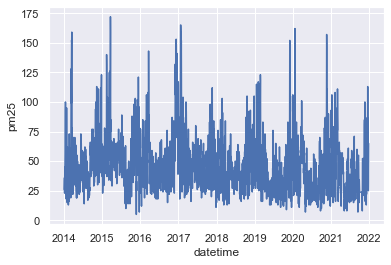

In [79]:
sns.lineplot(x='datetime', y='pm25', data=lyon)

<AxesSubplot:xlabel='datetime', ylabel='pm10'>

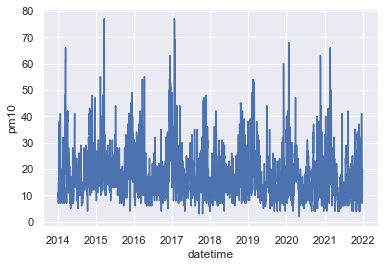

In [80]:
sns.lineplot(x='datetime', y='pm10', data=lyon)

<AxesSubplot:xlabel='datetime', ylabel='o3'>

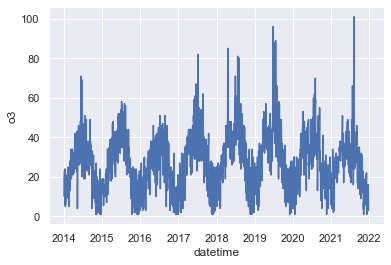

In [81]:
sns.lineplot(x='datetime', y='o3', data=lyon)

<AxesSubplot:xlabel='datetime', ylabel='no2'>

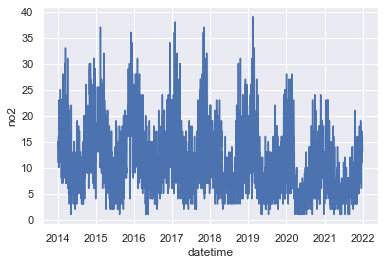

In [82]:
sns.lineplot(x='datetime', y='no2', data=lyon)

## Time series analysis of PM 2.5

In [83]:
data_pm25=lyon.pm25.tolist()
date_time = lyon.datetime.tolist()
pm25= pd.DataFrame({'ds':date_time, 'y':data_pm25})
pm25.dtypes

ds    datetime64[ns]
y            float64
dtype: object

#### Stationarity 

In [84]:
result = adfuller(pm25.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -5.90
5% Critical Value: -2.86
p-value: 0.00


In [85]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -5.895960e+00              Test Statistics
1  2.851129e-07                      p-value
2  2.700000e+01             No. of lags used
3  2.894000e+03  Number of observations used
4 -3.432612e+00          critical value (1%)
5 -2.862539e+00          critical value (5%)
6 -2.567302e+00         critical value (10%)


Basing on the Dickey - Fuller test I can conclude that the data is stationary as the p-value is below 0.05 

#### Autocorrelation

In [86]:
autocorrelation_lag1 = lyon['pm25'].autocorr(lag=1)
print("One Day Lag: ", autocorrelation_lag1)
autocorrelation_lag3 = lyon['pm25'].autocorr(lag=3)
print("Three Day Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = lyon['pm25'].autocorr(lag=6)
print("Six Day Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = lyon['pm25'].autocorr(lag=9)
print("Nine Day Lag: ", autocorrelation_lag9)

One Day Lag:  0.7702978834169572
Three Day Lag:  0.4665017179611204
Six Day Lag:  0.32543908342454
Nine Day Lag:  0.23001518749494507


C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


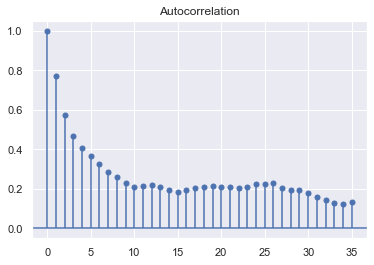

In [87]:
pmdarima.plot_acf(pm25.y)

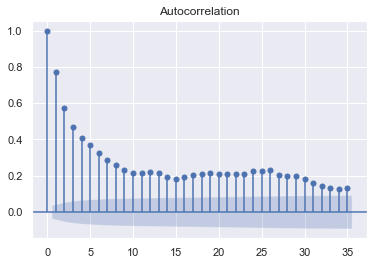

In [88]:
plot_acf(pm25.y)
plt.show()

#### Partial autocorrelation

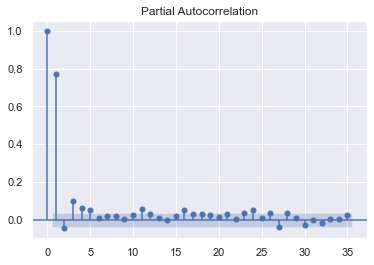

In [89]:
plot_pacf(pm25.y)
plt.show()

#### Decomposition to see the trend line

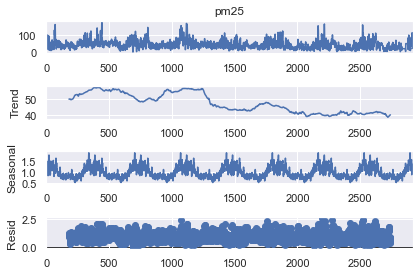

In [90]:
decompose = seasonal_decompose(lyon.pm25,model='multiplicative', period=365)
decompose.plot()
plt.show()

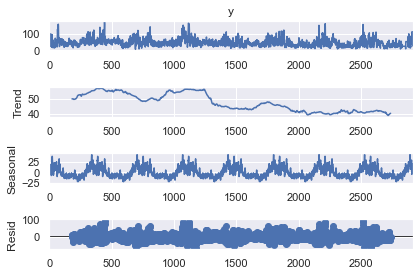

In [91]:
decompose_pm_add = seasonal_decompose(pm25.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

#### Train test split

In [92]:
(pm25.shape[0])*0.8

2337.6

In [93]:
train = pm25[:2338]
test = pm25[2338:]

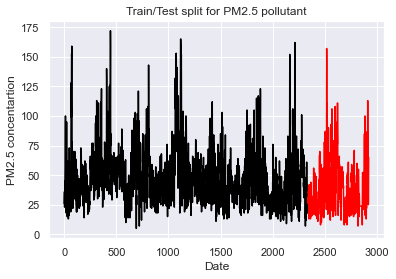

In [94]:
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for PM2.5 pollutant")
plt.ylabel("PM2.5 concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

### Prophet 

In [95]:
# define the model
model_pm25_1 = Prophet(daily_seasonality=False)
# fit the model
model_pm25_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  32.013078    4.452764   59.573629
1 2020-05-28  33.822160    5.535635   62.057050
2 2020-05-29  33.754302    6.671290   60.025649
3 2020-05-30  32.845110    6.731931   60.696160
4 2020-05-31  31.685090    4.180823   58.631580


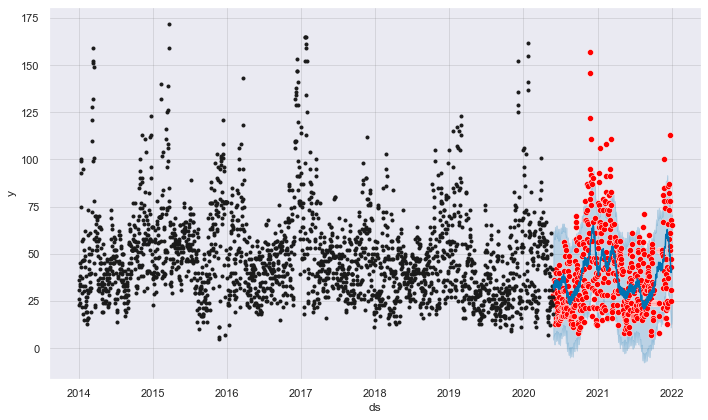

In [96]:
forecast_pm25_1 = model_pm25_1.predict(test)
# summarize the forecast
print(forecast_pm25_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_pm25_1.plot(forecast_pm25_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

In [97]:
future_1 = model_pm25_1.make_future_dataframe(periods=400, freq='D')
forecast1 = model_pm25_1.predict(future_1)
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2733,2021-06-26,38.083806,4.455132,58.653411,36.910677,39.345635,-6.974905,-6.974905,-6.974905,0.516409,0.516409,0.516409,-7.491314,-7.491314,-7.491314,0.0,0.0,0.0,31.108901
2734,2021-06-27,38.077256,2.609675,56.530405,36.900781,39.343903,-8.366544,-8.366544,-8.366544,-0.913761,-0.913761,-0.913761,-7.452783,-7.452783,-7.452783,0.0,0.0,0.0,29.710712
2735,2021-06-28,38.070706,1.468952,56.017927,36.889364,39.342488,-9.383328,-9.383328,-9.383328,-2.006566,-2.006566,-2.006566,-7.376762,-7.376762,-7.376762,0.0,0.0,0.0,28.687378
2736,2021-06-29,38.064157,0.022899,57.683548,36.877191,39.341114,-9.050648,-9.050648,-9.050648,-1.788070,-1.788070,-1.788070,-7.262578,-7.262578,-7.262578,0.0,0.0,0.0,29.013509
2737,2021-06-30,38.057607,4.070863,60.594883,36.865019,39.339739,-6.640361,-6.640361,-6.640361,0.470260,0.470260,0.470260,-7.110621,-7.110621,-7.110621,0.0,0.0,0.0,31.417246


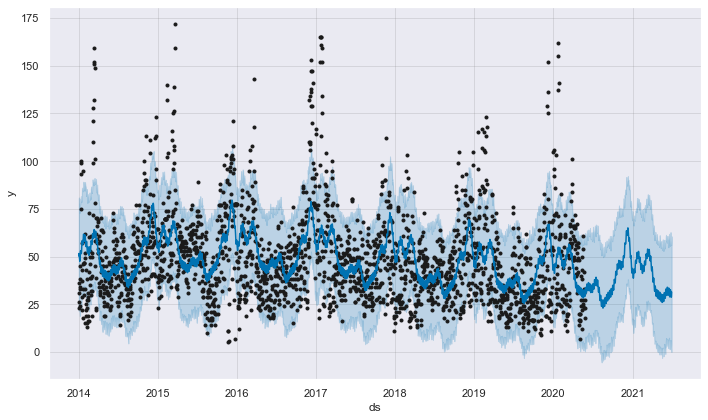

In [98]:
model_pm25_1.plot(forecast1)
plt.show()

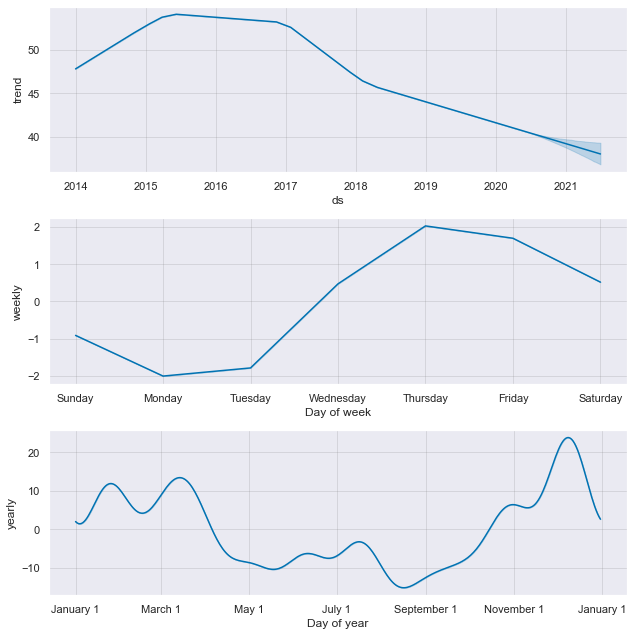

In [99]:
model_pm25_1.plot_components(forecast1)
plt.show()

Comparison of model values with real data 

In [100]:
# This test was done when dialy seasonality was not included in the model 

# rmse_pm25_prophet = rmse(test.y,forecast.yhat)
# rmse_pm25_prophet 

In [101]:
rmse_pm25_prophet_ds = rmse(test.y,forecast_pm25_1.yhat)
rmse_pm25_prophet_ds 

19.859571114454443

#### Training model on the whole historical data to make a prediction for the future

In [102]:
model_pm25_whole = Prophet(daily_seasonality=False)
# fit the model
model_pm25_whole.fit(pm25)

In [103]:
future_pm25_2022 = model_pm25_whole.make_future_dataframe(periods=365, freq='D')
forecast_pm25_2022 = model_pm25_whole.predict(future_pm25_2022)
forecast_pm25_2022.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3282,2022-12-27,36.207288,14.341105,70.938143,35.548617,36.965171,5.696043,5.696043,5.696043,-1.359057,-1.359057,-1.359057,7.055101,7.055101,7.055101,0.0,0.0,0.0,41.903331
3283,2022-12-28,36.202167,13.336479,70.458791,35.537219,36.964866,6.962866,6.962866,6.962866,0.556680,0.556680,0.556680,6.406187,6.406187,6.406187,0.0,0.0,0.0,43.165033
3284,2022-12-29,36.197045,16.732600,70.187852,35.528072,36.964815,8.075197,8.075197,8.075197,2.240415,2.240415,2.240415,5.834783,5.834783,5.834783,0.0,0.0,0.0,44.272242
3285,2022-12-30,36.191923,16.857841,71.547841,35.519254,36.961881,6.926569,6.926569,6.926569,1.580135,1.580135,1.580135,5.346434,5.346434,5.346434,0.0,0.0,0.0,43.118492
3286,2022-12-31,36.186802,16.159920,67.532516,35.511357,36.962663,5.077509,5.077509,5.077509,0.132323,0.132323,0.132323,4.945186,4.945186,4.945186,0.0,0.0,0.0,41.264311


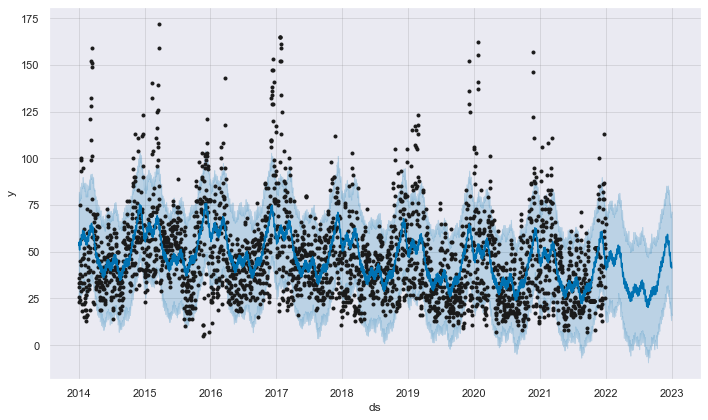

In [104]:
model_pm25_whole.plot(forecast_pm25_2022)
plt.show()

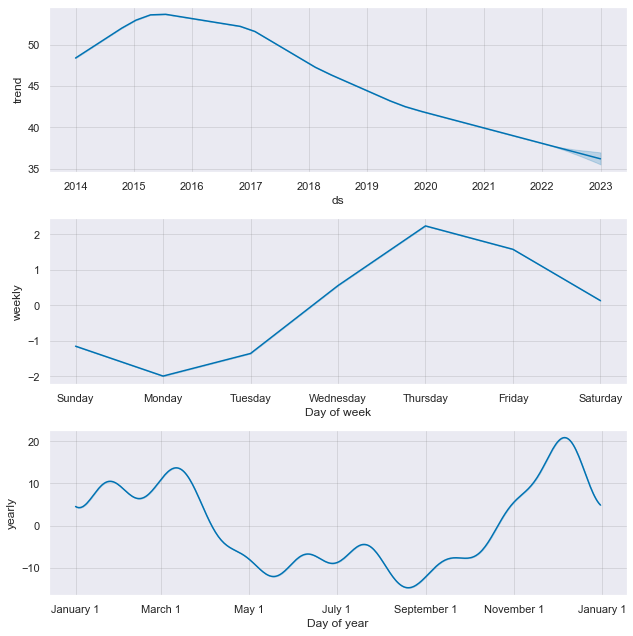

In [105]:
model_pm25_whole.plot_components(forecast_pm25_2022)
plt.show()

Adding columns for future export

In [106]:
forecast_pm25_2022['y']=pm25['y']
forecast_pm25_2022['poll']='pm25'

#### Time series analysis of PM10

In [107]:
data_pm10=lyon.pm10.tolist()
date_time = lyon.datetime.tolist()
pm10= pd.DataFrame({'ds':date_time, 'y':data_pm10})
pm10.dtypes

ds    datetime64[ns]
y            float64
dtype: object

Stationarity

In [108]:
result = adfuller(pm10.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -14.65
5% Critical Value: -2.86
p-value: 0.00


In [109]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -1.465231e+01              Test Statistics
1  3.484747e-27                      p-value
2  4.000000e+00             No. of lags used
3  2.917000e+03  Number of observations used
4 -3.432594e+00          critical value (1%)
5 -2.862531e+00          critical value (5%)
6 -2.567298e+00         critical value (10%)


In [110]:
'''As in case of PM2.5, the PM10 data is stationary'''

'As in case of PM2.5, the PM10 data is stationary'

Auto and partial correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


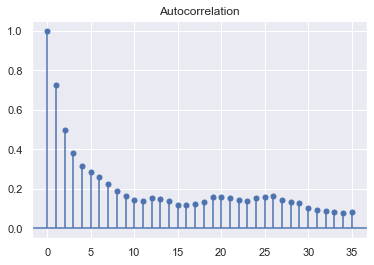

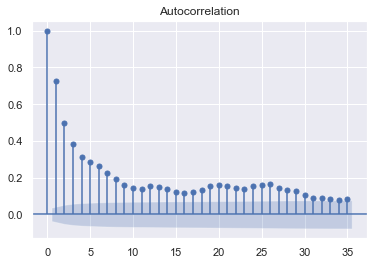

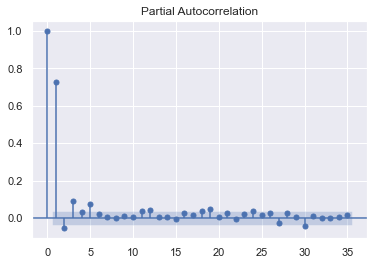

In [111]:
pmdarima.plot_acf(pm10.y)
plot_acf(pm10.y)
plt.show()
plot_pacf(pm10.y)
plt.show()

TREN LINE - Decomposition 

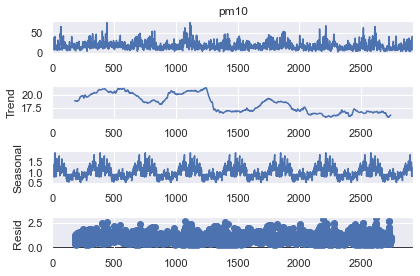

In [112]:
decompose = seasonal_decompose(lyon.pm10,model='multiplicative', period=365)
decompose.plot()
plt.show()

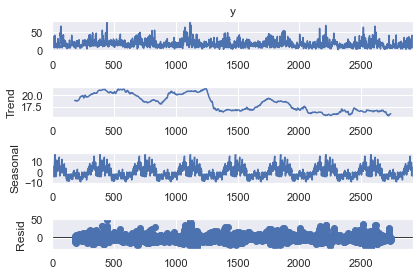

In [113]:
decompose_pm_add = seasonal_decompose(pm10.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train/test split

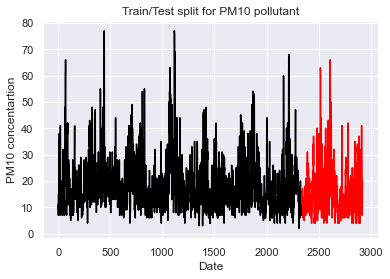

In [114]:
train = pm10[:2338]
test = pm10[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for PM10 pollutant")
plt.ylabel("PM10 concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

Prophet analysis 

In [115]:
# define the model
model_pm10_1 = Prophet(daily_seasonality=False)
# fit the model
model_pm10_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  13.628458    1.685878   26.101899
1 2020-05-28  13.482063    1.140770   26.025785
2 2020-05-29  11.935621    0.334381   25.186313
3 2020-05-30  10.785234   -1.533005   22.054631
4 2020-05-31  11.889329    0.319656   23.963116


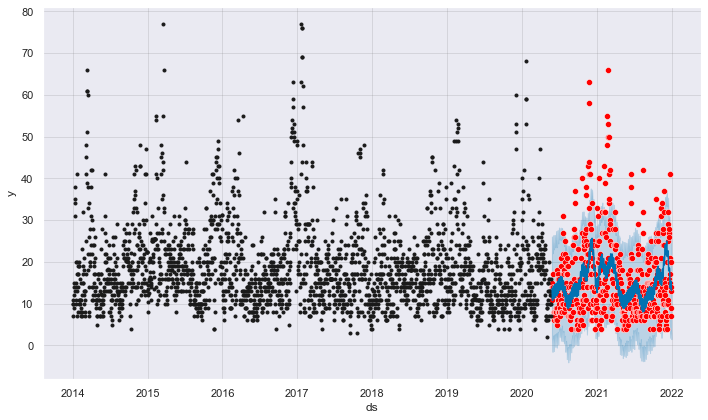

In [116]:
forecast_pm10_1 = model_pm10_1.predict(test)
# summarize the forecast
print(forecast_pm10_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_pm10_1.plot(forecast_pm10_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [117]:
rmse_pm25_prophet_ds = rmse(test.y,forecast_pm10_1.yhat)
rmse_pm25_prophet_ds 

9.166436481758957

Training model on the whole dataset

In [118]:
model_pm10_whole = Prophet(daily_seasonality=False)
# fit the model
model_pm10_whole.fit(pm10)

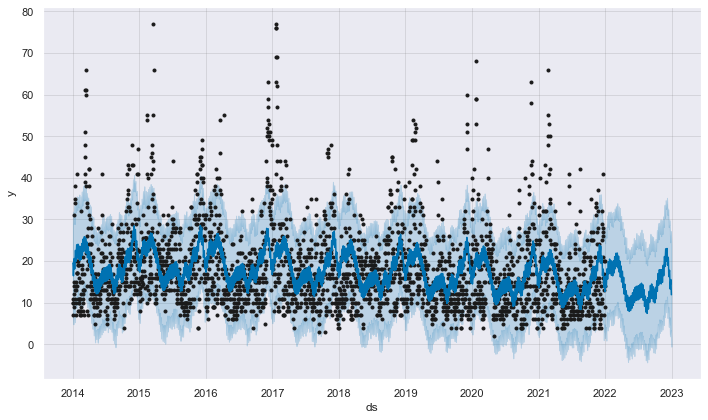

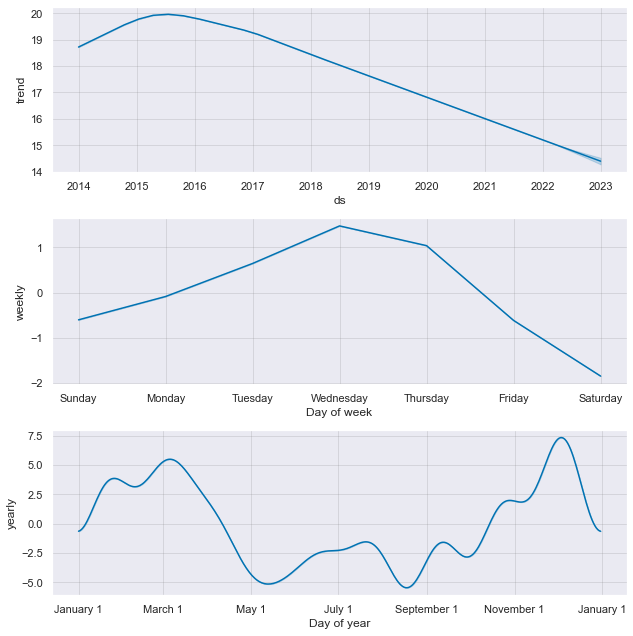

In [119]:
future_pm10_2022 = model_pm10_whole.make_future_dataframe(periods=365, freq='D')
forecast_pm10_2022 = model_pm10_whole.predict(future_pm10_2022)
forecast_pm10_2022.tail()

model_pm10_whole.plot(forecast_pm10_2022)
plt.show()

model_pm10_whole.plot_components(forecast_pm10_2022)
plt.show()

Adding columns for future analysis

In [120]:
forecast_pm10_2022['y']=pm10['y']
forecast_pm10_2022['poll']='pm10'

## O3

In [121]:
data_o3=lyon.o3.tolist()
date_time = lyon.datetime.tolist()
o3= pd.DataFrame({'ds':date_time, 'y':data_o3})
o3.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [122]:
o3.head()

,ds,y
0,2014-01-01,23.0
1,2014-01-02,10.0
2,2014-01-03,15.0
3,2014-01-04,20.0
4,2014-01-05,17.0


Stationarity

In [123]:
result = adfuller(o3.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -3.34
5% Critical Value: -2.86
p-value: 0.01


In [124]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -3.336707              Test Statistics
1     0.013315                      p-value
2    23.000000             No. of lags used
3  2898.000000  Number of observations used
4    -3.432608          critical value (1%)
5    -2.862538          critical value (5%)
6    -2.567301         critical value (10%)


In [125]:
#Data is stationary

Autocorrelation and Partial correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


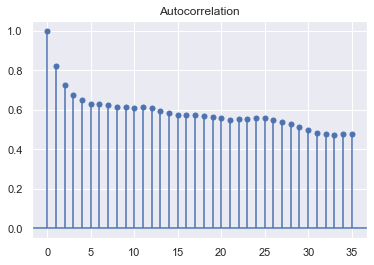

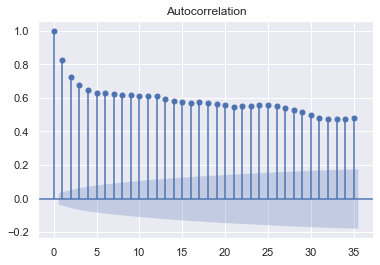

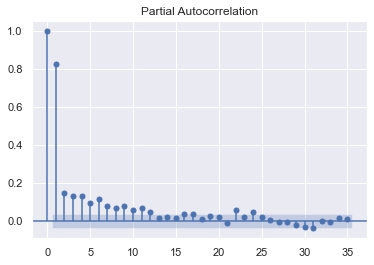

In [126]:
pmdarima.plot_acf(o3.y)
plot_acf(o3.y)
plt.show()
plot_pacf(o3.y)
plt.show()

TREND LINE

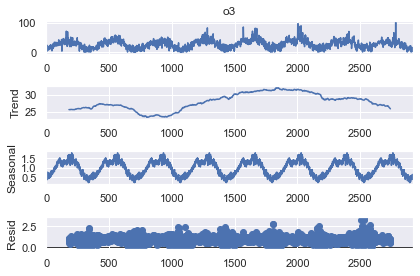

In [127]:
decompose = seasonal_decompose(lyon.o3,model='multiplicative', period=365)
decompose.plot()
plt.show()

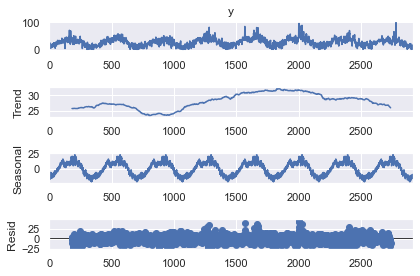

In [128]:
decompose_pm_add = seasonal_decompose(o3.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train test split

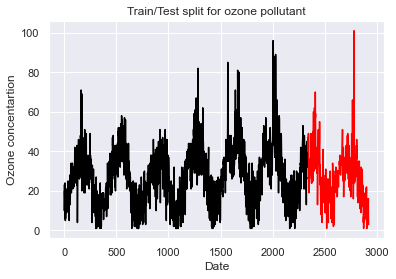

In [129]:
train = o3[:2338]
test = o3[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for ozone pollutant")
plt.ylabel("Ozone concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

Prophet analysis

In [130]:
# define the model
model_o3_1 = Prophet(daily_seasonality=False)
# fit the model
model_o3_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  39.179834   27.964313   49.887239
1 2020-05-28  39.701453   29.132023   50.756412
2 2020-05-29  40.091689   30.027715   50.575745
3 2020-05-30  40.567296   30.528380   50.949449
4 2020-05-31  39.235809   28.504146   49.754476


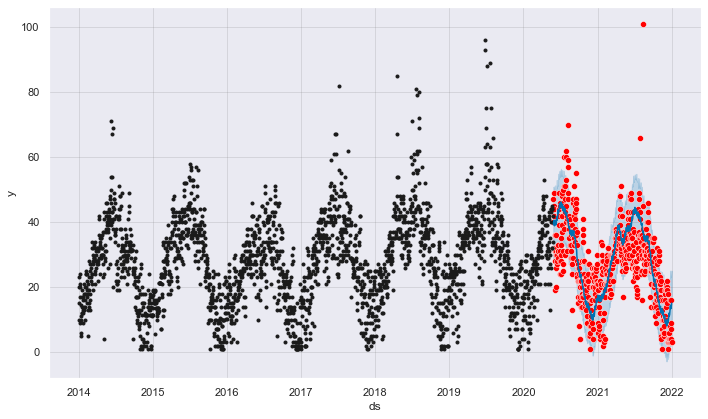

In [131]:
forecast_o3_1 = model_o3_1.predict(test)
# summarize the forecast
print(forecast_o3_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_o3_1.plot(forecast_o3_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [132]:
rmse_o3_prophet_ds = rmse(test.y,forecast_o3_1.yhat)
rmse_o3_prophet_ds 

9.041861566206991

Training on the whole dataset

In [133]:
model_o3_whole = Prophet(daily_seasonality=False)
# fit the model
model_o3_whole.fit(o3)

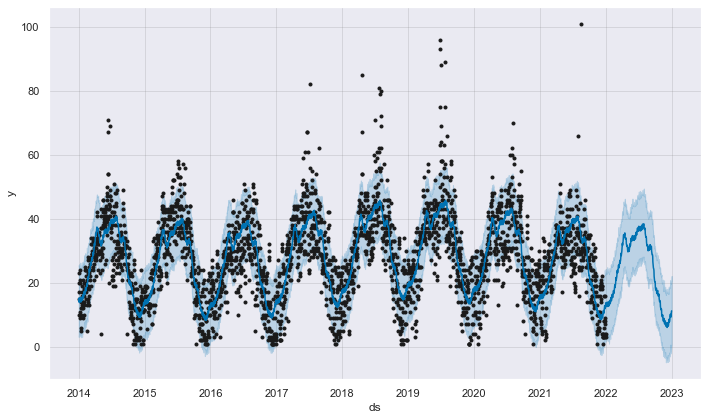

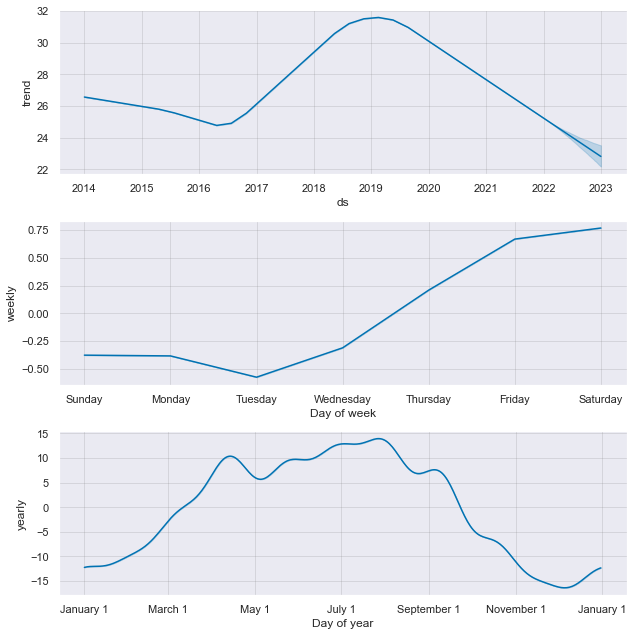

In [134]:
future_o3_2022 = model_o3_whole.make_future_dataframe(periods=365, freq='D')
forecast_o3_2022 = model_o3_whole.predict(future_o3_2022)
forecast_o3_2022.tail()

model_o3_whole.plot(forecast_o3_2022)
plt.show()

model_o3_whole.plot_components(forecast_o3_2022)
plt.show()

Adding columns for future analysis

In [135]:
forecast_o3_2022['y']=o3['y']
forecast_o3_2022['poll']='o3'

## NO2

In [136]:
data_no2=lyon.no2.tolist()
date_time = lyon.datetime.tolist()
no2= pd.DataFrame({'ds':date_time, 'y':data_no2})
no2.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [137]:
no2.head()

,ds,y
0,2014-01-01,14.0
1,2014-01-02,15.0
2,2014-01-03,11.0
3,2014-01-04,15.0
4,2014-01-05,16.0


Stationarity

In [138]:
result = adfuller(no2.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -3.68
5% Critical Value: -2.86
p-value: 0.00


In [139]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -3.682542              Test Statistics
1     0.004366                      p-value
2    28.000000             No. of lags used
3  2893.000000  Number of observations used
4    -3.432612          critical value (1%)
5    -2.862540          critical value (5%)
6    -2.567302         critical value (10%)


In [140]:
#data is stationary 

Autocorrelation and Partial Correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


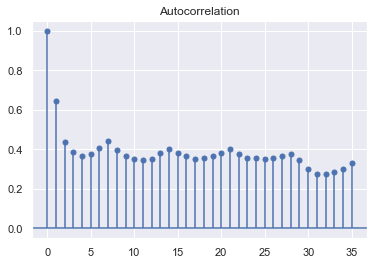

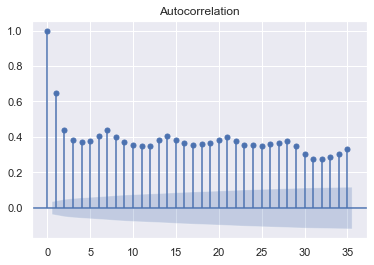

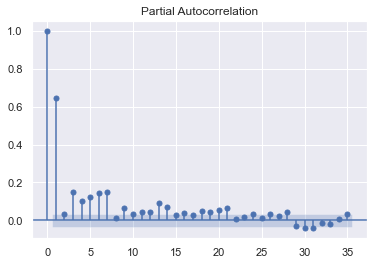

In [141]:
pmdarima.plot_acf(no2.y)
plot_acf(no2.y)
plt.show()
plot_pacf(no2.y)
plt.show()

TREND LINE

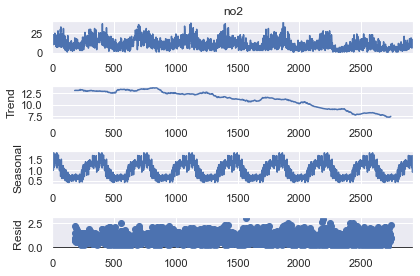

In [142]:
decompose = seasonal_decompose(lyon.no2,model='multiplicative', period=365)
decompose.plot()
plt.show()

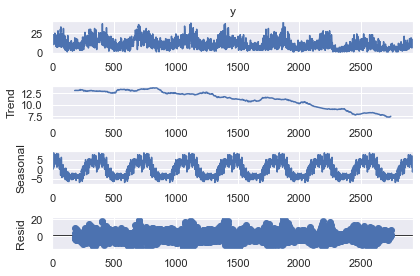

In [143]:
decompose_pm_add = seasonal_decompose(no2.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train/test split

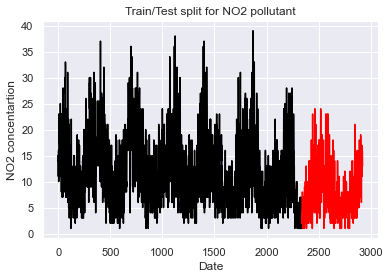

In [144]:
train = no2[:2338]
test = no2[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for NO2 pollutant")
plt.ylabel('NO2 concentartion')
plt.xlabel('Date')
sns.set()
plt.show()

Prophet Analysis

In [145]:
# define the model
model_no2_1 = Prophet(daily_seasonality=False)
# fit the model
model_no2_1.fit(train)

          ds      yhat  yhat_lower  yhat_upper
0 2020-05-27  6.055856   -0.520074   13.049676
1 2020-05-28  6.259692   -0.469005   12.999331
2 2020-05-29  3.809936   -3.468582   10.608436
3 2020-05-30  1.813200   -5.127006    8.453219
4 2020-05-31  4.223182   -2.058717   10.856077


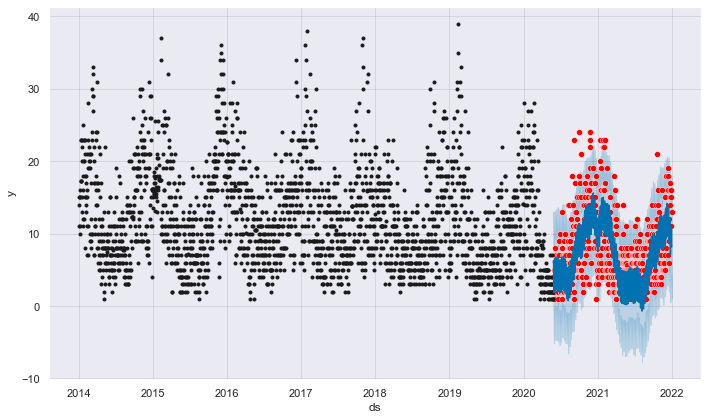

In [146]:
forecast_no2_1 = model_no2_1.predict(test)
# summarize the forecast
print(forecast_no2_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_no2_1.plot(forecast_no2_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [147]:
rmse_no2_prophet_ds = rmse(test.y,forecast_no2_1.yhat)
rmse_no2_prophet_ds 

4.173000405592053

Trainning on the whole data set

In [148]:
model_no2_whole = Prophet(daily_seasonality=False)
# fit the model
model_no2_whole.fit(no2)

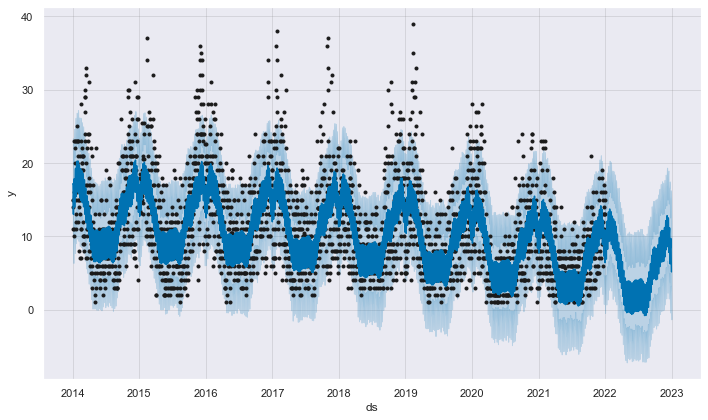

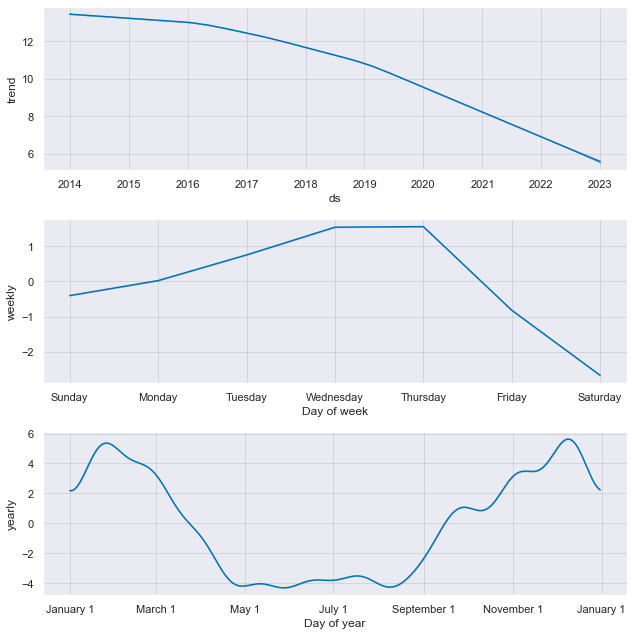

In [149]:
future_no2_2022 = model_no2_whole.make_future_dataframe(periods=365, freq='D')
forecast_no2_2022 = model_no2_whole.predict(future_no2_2022)
forecast_no2_2022.tail()

model_no2_whole.plot(forecast_no2_2022)
plt.show()

model_no2_whole.plot_components(forecast_no2_2022)
plt.show()

In [150]:
forecast_no2_2022['y']=no2['y']
forecast_no2_2022['poll']='no2'

## Exporting file for EDA - Section2

In [151]:
data_sec2_lyon = pd.concat([forecast_pm25_2022,forecast_pm10_2022,forecast_o3_2022,forecast_no2_2022])

In [152]:
data_sec2_lyon.shape

(13148, 21)

In [156]:
data_sec2_lyon['year']=data_sec2_lyon['ds'].dt.year
data_sec2_lyon['month']=data_sec2_lyon['ds'].dt.month
data_sec2_lyon['day_of_week']=data_sec2_lyon['ds'].dt.day_name()

In [157]:
data_sec2_lyon.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y,poll,year,month,day_of_week
0,2014-01-01,48.389216,25.566714,80.493283,48.389216,48.389216,5.126439,5.126439,5.126439,0.556680,...,4.569759,0.0,0.0,0.0,53.515654,26.0,pm25,2014,1,Wednesday
1,2014-01-02,48.401781,27.984405,82.082121,48.401781,48.401781,6.611617,6.611617,6.611617,2.240415,...,4.371202,0.0,0.0,0.0,55.013398,31.0,pm25,2014,1,Thursday
2,2014-01-03,48.414347,25.547758,80.785060,48.414347,48.414347,5.842237,5.842237,5.842237,1.580135,...,4.262102,0.0,0.0,0.0,54.256584,36.0,pm25,2014,1,Friday
3,2014-01-04,48.426913,26.021268,78.685070,48.426913,48.426913,4.372233,4.372233,4.372233,0.132323,...,4.239910,0.0,0.0,0.0,52.799146,23.0,pm25,2014,1,Saturday
4,2014-01-05,48.439479,23.165506,77.421402,48.439479,48.439479,3.146962,3.146962,3.146962,-1.153676,...,4.300639,0.0,0.0,0.0,51.586441,33.0,pm25,2014,1,Sunday


In [155]:
data_sec2_lyon.to_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\07 - EDA\sec2_Lyon.csv', index_label=False)